In [1]:
import keras
import tensorflow
import flask
import PIL

D:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline


In [3]:
from keras.preprocessing.image import ImageDataGenerator

In [16]:
S=200 # shape of our image
trainGen=ImageDataGenerator(rescale=1./255)

In [17]:
train_set=trainGen.flow_from_directory('me_vs_celeb', target_size=(S,S),color_mode='rgb', batch_size=8,class_mode='categorical') 
#Batch size le group group ma lanxa

Found 20 images belonging to 2 classes.


In [18]:
print(len(train_set))

3


In [22]:
train_set[0][1]

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

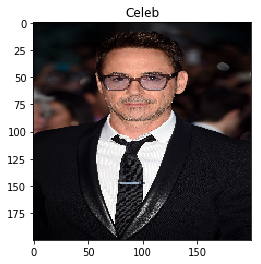

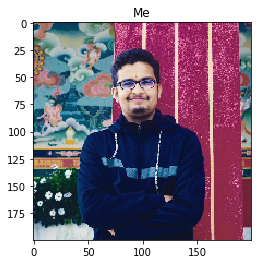

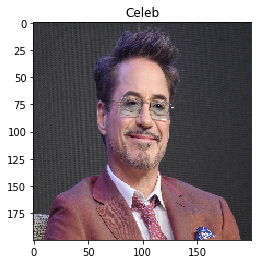

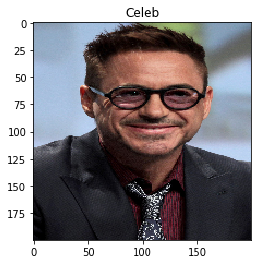

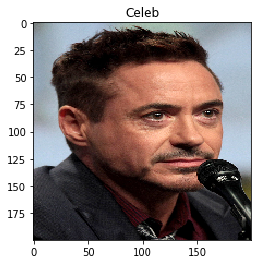

In [26]:
classes=['Celeb','Me']

for i in range(5):
    plt.imshow(train_set[0][0][i]) #first ko 0 le batch, 2md ko 0 le ki 0 ki 1 linxa, i chai indexxing
    label=train_set[0][1][i]
    plt.title(classes[np.argmax(label)])
    plt.show()

In [27]:
#CNN model
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from keras import optimizers

In [35]:
model=Sequential()
model.add(Conv2D(S,(3,3),padding='same',input_shape=(S,S,3),activation='relu'))
model.add(Flatten())
model.add(Dense(2,activation='softmax')) #Probality denity dinxa. yo value le yo input yo range ma parne chance xa vanxa
model.summary()  #classification ma softmax

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 198, 198, 200)     5600      
_________________________________________________________________
flatten_4 (Flatten)          (None, 7840800)           0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 15681602  
Total params: 15,687,202
Trainable params: 15,687,202
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile('sgd', 'categorical_crossentropy',metrics=['acc'])

In [40]:
model.fit_generator(train_set, steps_per_epoch=10, epochs=5)

Epoch 1/5
10/10 [==============================] - 20s 2s/step - loss: 7.7158 - acc: 0.4531
Epoch 2/5
10/10 [==============================] - 19s 2s/step - loss: 8.6301 - acc: 0.4646
Epoch 3/5
10/10 [==============================] - 22s 2s/step - loss: 7.2833 - acc: 0.5481
Epoch 4/5
10/10 [==============================] - 23s 2s/step - loss: 8.6314 - acc: 0.4645
Epoch 5/5
10/10 [==============================] - 25s 3s/step - loss: 8.4254 - acc: 0.4773


In [41]:
testGen=ImageDataGenerator(rescale=1./255)

In [42]:
test_set=trainGen.flow_from_directory('test', target_size=(S,S),color_mode='rgb', batch_size=8,class_mode='categorical')

Found 6 images belonging to 2 classes.


In [44]:
score=model.evaluate_generator(test_set,steps=1)

In [45]:
score

[8.05904769897461, 0.5]

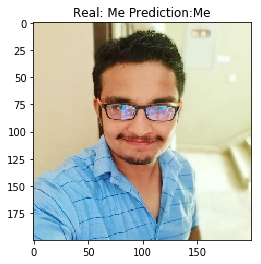

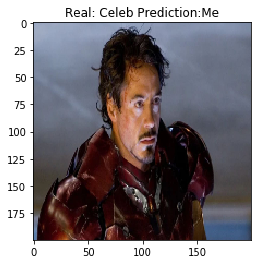

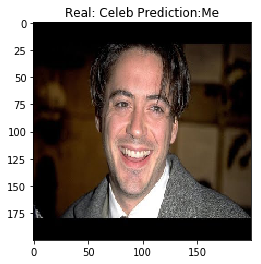

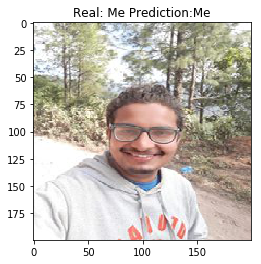

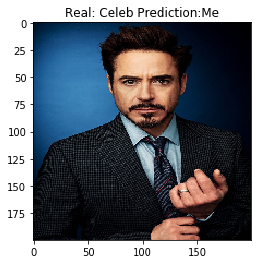

In [49]:
for i in range(5):
    plt.imshow(test_set[0][0][i])
    label=test_set[0][1][i]
    image=test_set[0][0][i]
    prediction=model.predict(image.reshape(1,S,S,3))
    plt.title(f"Real: {classes[np.argmax(label)]} Prediction:{classes[np.argmax(prediction)]}")
    plt.show()

In [47]:
x =0
print(f"hi {x}")

hi 0
